<a href="https://colab.research.google.com/github/brandnewmin/brandnewm/blob/master/ISLR4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings #경고메세지

from rpy2.robjects.packages import importr #python 상에서 r 코드를 사용할 때
from rpy2.robjects.packages import data as rdata
from rpy2.robjects import pandas2ri
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm #statsmodel ; 통계분석 파이썬 패키지
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
import statsmodels.graphics.api as smg

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/ISLR")
%ls

Advertising.csv  Caravan.gsheet  ISLR_3.ipynb  Smarket.csv
Caravan.csv      Credit.csv      ISLR4.ipynb


In [0]:
Smarket = pd.read_csv('Smarket.csv')
Smarket.info() #칼럼 별 데이터 확인
Smarket.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1250 non-null   int64  
 1   Year        1250 non-null   int64  
 2   Lag1        1250 non-null   float64
 3   Lag2        1250 non-null   float64
 4   Lag3        1250 non-null   float64
 5   Lag4        1250 non-null   float64
 6   Lag5        1250 non-null   float64
 7   Volume      1250 non-null   float64
 8   Today       1250 non-null   float64
 9   Direction   1250 non-null   object 
dtypes: float64(7), int64(2), object(1)
memory usage: 97.8+ KB


,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [0]:
Smarket.corr()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Unnamed: 0,1.000000,0.979773,0.035415,0.036022,0.038989,0.041437,0.035025,0.546348,0.035273
Year,0.979773,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.035415,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.036022,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.038989,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.041437,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.035025,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.546348,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.035273,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


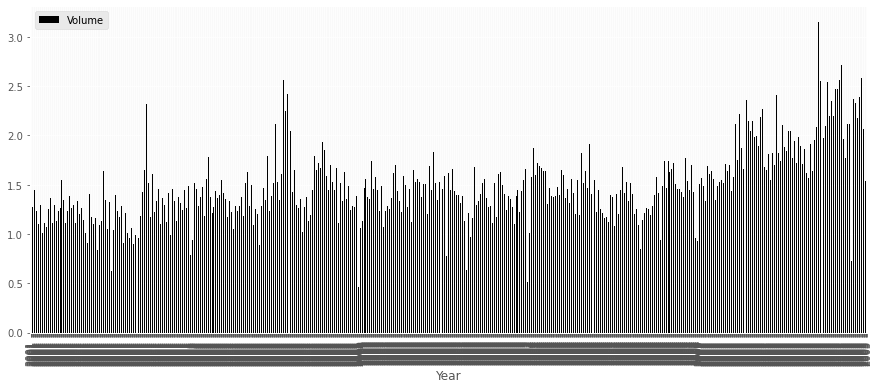

In [0]:
ax = Smarket.plot('Year', 'Volume', kind='bar', figsize = (15,6), color='k')

In [0]:
xticklabels=['',]*Smarket.shape[0]
xtext,xlocs = np.unique(Smarket.Year,return_index=True) #np.unique : 중복제거
for t, i in zip(xtext,xlocs):
  xticklabels[i]=str(int(t)) #zip : t,i 를 벡터라고 할 때, 같은 열에 있는 원소끼리 리스트로 묶어주는 기능
ax.set_xticklabels(xticklabels,rotation=0)

ax.set_ylabel('Volume')
ax.set_title('S&P 500 volume over 1250 days.')
plt.show()

In [0]:
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
Smarket_glm = smf.glm(formula, data=Smarket, family=sm.families.Binomial()).fit()
print('Deviance Residuals :')
display(Smarket_glm.resid_deviance.describe())
print(Smarket_glm.summary())
print('\n Null deviance : {0:.1f} on {1} degrees of freedom'.format(Smarket_glm.null_deviance, Smarket_glm.df_model+Smarket_glm.df_resid))

Deviance Residuals :


count    1250.000000
mean       -0.012030
std         1.176023
min        -1.325832
25%        -1.145081
50%        -1.065292
75%         1.203130
max         1.446343
dtype: float64

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 25 May 2020   Deviance:                       1727.6
Time:                                          07:30:57   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [0]:
print('Residual deviance : {0:.1f} on {1} degrees of freedom'.format(Smarket_glm.deviance, Smarket_glm.df_resid))
print('AIC : {0:.2f}'.format(Smarket_glm.aic))

Residual deviance : 1727.6 on 1243 degrees of freedom
AIC : 1741.58


In [0]:
features = {'Lag1', 'Lag2','Lag3','Lag4','Lag5','Volume'}
response = 'Direction'

X = Smarket[features]
y = Smarket[response]
logreg = LogisticRegression(C=1e9)
logreg.fit(X,y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
coef = pd.DataFrame(logreg.coef_, columns=features)
coef.insert(loc=0, column='(Intercept)', value=logreg.intercept_)
coef.index=['']
display(coef)

,(Intercept),Lag3,Lag2,Lag1,Volume,Lag5,Lag4
,-0.126008,0.011086,-0.042301,-0.073073,0.135446,0.010313,0.00936


In [0]:
print('First ten in-sample prediction probabilities P(Y=1|X): ')
display(logreg.predict_proba(X)[0:10,1])

y_pred = logreg.predict(X)
print('In_sample prediction decision results: ')
display(y_pred[0:10])

First ten in-sample prediction probabilities P(Y=1|X): 


array([0.50708369, 0.48146717, 0.48113874, 0.51522232, 0.51078106,
       0.50695658, 0.49265099, 0.5092293 , 0.51761327, 0.48883779])

In_sample prediction decision results: 


array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down'],
      dtype=object)

In [0]:
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y,y_pred, labels=logreg.classes_)
print("Confusion Matrix:")
print(cfmat, cfmat_cnames, cfmat_index)
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
#columns : 열 이름 , index : 행 이름

Confusion Matrix:
[[145 457]
 [141 507]] MultiIndex([('Predict', 'Down'),
            ('Predict',   'Up')],
           ) MultiIndex([('True', 'Down'),
            ('True',   'Up')],
           )


Predict     
             Down   Up
True Down     145  457
     Up       141  507

In [0]:
Smarket_train = Smarket[Smarket.Year!=2005]
Smarket_test = Smarket[Smarket.Year == 2005]
print(Smarket_train)
#features, response 는 위랑 똑같아서 따로 지정 안 함
#rain
X = Smarket_train[features]
#print(X) 순서대로 정렬하는 법 없나
y = Smarket_train[response]
#response = 'Direction' -> y = Smarket_train[response] : 종속변수를 지정하는 과정
logreg = LogisticRegression(C=1e9) #C=1e9 : 정규화 과정?
logreg.fit(X,y)

     Unnamed: 0  Year   Lag1   Lag2  ...   Lag5  Volume  Today  Direction
0             1  2001  0.381 -0.192  ...  5.010  1.1913  0.959         Up
1             2  2001  0.959  0.381  ... -1.055  1.2965  1.032         Up
2             3  2001  1.032  0.959  ... -2.624  1.4112 -0.623       Down
3             4  2001 -0.623  1.032  ... -0.192  1.2760  0.614         Up
4             5  2001  0.614 -0.623  ...  0.381  1.2057  0.213         Up
..          ...   ...    ...    ...  ...    ...     ...    ...        ...
993         994  2004  0.046  0.342  ... -0.749  0.9561 -0.431       Down
994         995  2004 -0.431  0.046  ...  0.038  0.9220  0.715         Up
995         996  2004  0.715 -0.431  ...  0.904  0.9830 -0.007       Down
996         997  2004 -0.007  0.715  ...  0.342  0.9259  0.008         Up
997         998  2004  0.008 -0.007  ...  0.046  0.8298 -0.134       Down

[998 rows x 10 columns]


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#test
X = Smarket_test[features]
y = Smarket_test[response]
y_pred = logreg.predict(X)

In [0]:
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print('Confusion Matrix : ')
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index = cfmat_index))
print('Score : ', logreg.score(X,y))

Confusion Matrix : 


Predict    
             Down  Up
True Down      77  34
     Up        97  44

Score :  0.4801587301587302


### **LDA**

In [0]:
features = ['Lag1', 'Lag2']
response = 'Direction'

X = Smarket_train[features]
y = Smarket_train[response]
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

priors = pd.DataFrame(lda.priors_, index=lda.classes_, columns=['']).T
#나는 lda.prior을 사전에 정의한 적이 없는 것 같은데 자동으로 정해져있나?
print('Prior probabilities of groups:')
display(priors)
gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print('\nGroup means : ')
display(gmeans)
coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features)
print('\nCoefficients of linear discriminants')
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means : 


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of linear discriminants


,LD1
Lag1,-0.642019
Lag2,-0.513529


In [0]:
#print(lda.priors_) : 이게 무슨 값인데?

[0.49198397 0.50801603]


AttributeError: ignored

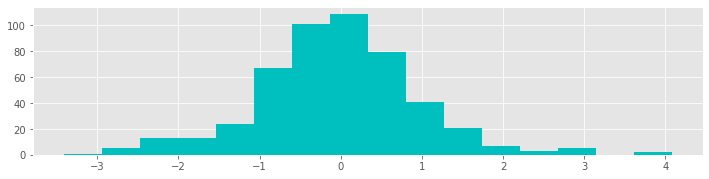

In [0]:
Smarket_grouped = Smarket_train.groupby('Direction')
Smarket_down = Smarket_grouped.get_group('Down')
Smarket_up = Smarket_grouped.get_group('Up')
discrim_down = lda.transform(Smarket_down[['Lag1', 'Lag2']])
plt.figure(figsize=(12,6))
plt.subplot(2,1,1) #배경
plt.hist(discrim_down, 16, normed=True, color='c')
plt.title('group down') #제목이 출력 안돼

AttributeError: ignored

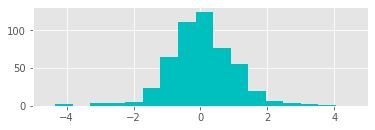

In [0]:
discrim_up = lda.transform(Smarket_up[['Lag1','Lag2']])
plt.subplot(2,1,2)
plt.xlim(-5,5)
plt.hist(discrim_up, 16, normed=True, color='c')
plt.title('group up')
plt.xlim(-5,5)
plt.show()

In [0]:
X = Smarket_test[['Lag1', 'Lag2']]
y = Smarket_test[['Direction']]
y_pred = lda.predict(X)
posterior = pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)
discrim_test = lda.transform(X)

In [0]:
cfmant_cnames = pd.MultiIndex.from_product([['Predict'], lda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], lda.classes_])
cfmat = confusion_matrix(y,y_pred,labels=lda.classes_)
display(pd.DataFrame(cfmat, columns=cfmant_cnames, index=cfmat_index))

Predict     
             Down   Up
True Down      35   76
     Up        35  106

In [0]:
print('Posterior probabilities:')
print(posterior.iloc[:20])
print('\nFirst 20 prediction results:\n', y_pred[:20])
print('\nNumber of Down class with threshold = 0.9', sum(posterior['Down']>0.9)) #이런 작업이 무엇을 원하는지?

Posterior probabilities:
        Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367

First 20 prediction results:
 ['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']

Number of Down class with threshold = 0.9 0


**Quadratic Discriminant Analysis**

In [0]:
features = ['Lag1','Lag2']
response = 'Direction'

In [0]:
X = Smarket_train[features]
y = Smarket_train[response]
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [0]:
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print('Prior probabilities of groups:')
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print('\nGroup means')
display(gmeans)
coef = pd.DataFrame(qda.scalings_, columns=['QD1', 'QD2'], index=features)
print('\nCoefficients of quadratic discriminants:')
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of quadratic discriminants:


,QD1,QD2
Lag1,1.562945,1.479273
Lag2,1.534551,1.472723


In [0]:
X = Smarket_test[features]
y = Smarket_test[response]
y_pred = qda.predict(X)

cfmat_cnames = pd.MultiIndex.from_product([['Predict'], qda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], qda.classes_])

In [0]:
cfmat = confusion_matrix(y,y_pred, labels=qda.classes_)
print('\nConfusion Matrix:')
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore :', qda.score(X,y))


Confusion Matrix:


Predict     
             Down   Up
True Down      30   81
     Up        20  121


Score : 0.5992063492063492


**K-Nearest Neighbors**

In [0]:
K = 1
X = Smarket_train[features]
y = Smarket_train[response]
knn = KNeighborsClassifier(n_neighbors = K)

NameError: ignored

**An Application to Caravan Insurance Data**

In [0]:
# Import Caravan data from R package ISLR
#islr = importr('ISLR')
#caravan_rdf = rdata(islr).fetch('Caravan')['Caravan']
#caravan = pandas2ri.ri2py(caravan_rdf)  : 쓰진 못하겠는데 적어도 이 명령어 의미와 과정은 알아두기

R[write to console]: Error in loadNamespace(name) : there is no package called ‘ISLR’
Calls: <Anonymous> ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart



RRuntimeError: ignored

In [0]:
#r에서 csv 파일로 데이터 전환 저장
pd.read_csv("Caravan.csv")
caravan = pd.read_csv('Caravan.csv')
caravan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5822 non-null   int64 
 1   MOSTYPE     5822 non-null   int64 
 2   MAANTHUI    5822 non-null   int64 
 3   MGEMOMV     5822 non-null   int64 
 4   MGEMLEEF    5822 non-null   int64 
 5   MOSHOOFD    5822 non-null   int64 
 6   MGODRK      5822 non-null   int64 
 7   MGODPR      5822 non-null   int64 
 8   MGODOV      5822 non-null   int64 
 9   MGODGE      5822 non-null   int64 
 10  MRELGE      5822 non-null   int64 
 11  MRELSA      5822 non-null   int64 
 12  MRELOV      5822 non-null   int64 
 13  MFALLEEN    5822 non-null   int64 
 14  MFGEKIND    5822 non-null   int64 
 15  MFWEKIND    5822 non-null   int64 
 16  MOPLHOOG    5822 non-null   int64 
 17  MOPLMIDD    5822 non-null   int64 
 18  MOPLLAAG    5822 non-null   int64 
 19  MBERHOOG    5822 non-null   int64 
 20  MBERZELF

In [0]:
list(caravan)

['Unnamed: 0',
 'MOSTYPE',
 'MAANTHUI',
 'MGEMOMV',
 'MGEMLEEF',
 'MOSHOOFD',
 'MGODRK',
 'MGODPR',
 'MGODOV',
 'MGODGE',
 'MRELGE',
 'MRELSA',
 'MRELOV',
 'MFALLEEN',
 'MFGEKIND',
 'MFWEKIND',
 'MOPLHOOG',
 'MOPLMIDD',
 'MOPLLAAG',
 'MBERHOOG',
 'MBERZELF',
 'MBERBOER',
 'MBERMIDD',
 'MBERARBG',
 'MBERARBO',
 'MSKA',
 'MSKB1',
 'MSKB2',
 'MSKC',
 'MSKD',
 'MHHUUR',
 'MHKOOP',
 'MAUT1',
 'MAUT2',
 'MAUT0',
 'MZFONDS',
 'MZPART',
 'MINKM30',
 'MINK3045',
 'MINK4575',
 'MINK7512',
 'MINK123M',
 'MINKGEM',
 'MKOOPKLA',
 'PWAPART',
 'PWABEDR',
 'PWALAND',
 'PPERSAUT',
 'PBESAUT',
 'PMOTSCO',
 'PVRAAUT',
 'PAANHANG',
 'PTRACTOR',
 'PWERKT',
 'PBROM',
 'PLEVEN',
 'PPERSONG',
 'PGEZONG',
 'PWAOREG',
 'PBRAND',
 'PZEILPL',
 'PPLEZIER',
 'PFIETS',
 'PINBOED',
 'PBYSTAND',
 'AWAPART',
 'AWABEDR',
 'AWALAND',
 'APERSAUT',
 'ABESAUT',
 'AMOTSCO',
 'AVRAAUT',
 'AAANHANG',
 'ATRACTOR',
 'AWERKT',
 'ABROM',
 'ALEVEN',
 'APERSONG',
 'AGEZONG',
 'AWAOREG',
 'ABRAND',
 'AZEILPL',
 'APLEZIER',
 'AFIETS',

In [0]:
display(caravan.head(10))
display(caravan['Purchase'].value_counts())

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,...,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,...,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,...,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
5,6,23,1,2,1,5,0,5,0,5,0,6,3,3,5,2,0,5,4,2,0,0,4,2,2,2,2,2,4,2,9,0,5,3,3,9,0,5,2,3,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
6,7,39,2,3,2,9,2,2,0,5,7,2,0,0,3,6,0,4,5,0,0,0,4,1,5,0,1,4,5,0,6,3,8,0,1,9,0,4,3,3,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
7,8,33,1,2,3,8,0,7,0,2,7,2,0,0,5,4,0,3,6,2,0,0,2,5,2,2,1,2,5,2,0,9,4,4,2,6,3,2,5,3,...,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,No
8,9,33,1,2,4,8,0,1,3,6,6,0,3,3,3,3,0,1,8,1,1,0,1,8,1,1,1,0,8,1,9,0,5,2,3,7,2,7,2,1,...,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,No
9,10,11,2,3,3,3,3,5,0,2,7,0,2,2,2,6,0,4,5,2,0,0,3,3,3,1,2,1,4,2,0,9,6,1,2,6,3,2,3,3,...,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


No     5474
Yes     348
Name: Purchase, dtype: int64

In [0]:
features = caravan.columns.drop('Purchase')
response = 'Purchase'
X_scaled = scale(caravan[features])
X_train = X_scaled[1000:]
y_train = caravan[response][1000:]
X_test = X_scaled[:1000]
y_test = caravan[response][:1000]
print("Training features shape : ", X_train.shape)
print("Test feature shape : ",X_test.shape)

Training features shape :  (4822, 86)
Test feature shape :  (1000, 86)


In [0]:
for K in (1,3,5):
  print('\n==================\nK = {}:'.format(K))
  knn = KNeighborsClassifier(n_neighbors=K)
  knn.fit(X_train,y_train)
  y_pred = knn.predict(X_test)
  #정확성 평가하기
  cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
  cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
  print('\nConfusion Matrix : ')
  display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index)) #왜 여기서 갑자기 표가 각 줄 아래에 하나씩 생겼을까 표 생긴 이유는 아는데 표가 저렇게 들어갈 수 있는 이유가 뭐야?
  print("\nScore:", knn.score(X_test, y_test))
  print('\nClassification Report:')
  print(classification_report(y_test, y_pred, digits=3))


K = 1:

Confusion Matrix : 


Predict     
              No  Yes
True No       30   81
     Yes      20  121


Score: 0.893

Classification Report:
              precision    recall  f1-score   support

          No      0.948     0.937     0.943       941
         Yes      0.157     0.186     0.171        59

    accuracy                          0.893      1000
   macro avg      0.553     0.562     0.557      1000
weighted avg      0.902     0.893     0.897      1000


K = 3:

Confusion Matrix : 


Predict     
              No  Yes
True No       30   81
     Yes      20  121


Score: 0.927

Classification Report:
              precision    recall  f1-score   support

          No      0.946     0.979     0.962       941
         Yes      0.231     0.102     0.141        59

    accuracy                          0.927      1000
   macro avg      0.588     0.540     0.552      1000
weighted avg      0.903     0.927     0.913      1000


K = 5:

Confusion Matrix : 


Predict     
              No  Yes
True No       30   81
     Yes      20  121


Score: 0.938

Classification Report:
              precision    recall  f1-score   support

          No      0.944     0.993     0.968       941
         Yes      0.364     0.068     0.114        59

    accuracy                          0.938      1000
   macro avg      0.654     0.530     0.541      1000
weighted avg      0.910     0.938     0.918      1000



In [0]:
#training set에서 로지스틱 회귀와 test set에서 예측
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
#정확성 평가
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'],logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print('\nConfusion Matrix : ')
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\n Classification Report : ')
print(classification_report(y_test, y_pred, digits=3))


Confusion Matrix : 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predict    
              No Yes
True No      935   6
     Yes      59   0


 Classification Report : 
              precision    recall  f1-score   support

          No      0.941     0.994     0.966       941
         Yes      0.000     0.000     0.000        59

    accuracy                          0.935      1000
   macro avg      0.470     0.497     0.483      1000
weighted avg      0.885     0.935     0.909      1000



In [0]:
posterior = logreg.predict_proba(X_test)
Yes_idx = np.where(logreg.classes_ == 'Yes')[0][0]
y_pred = pd.Series(posterior[:, Yes_idx]>0.25)
y_pred.replace([True,False], ['Yes','No'], inplace =True)

cfmat=confusion_matrix(y_test,y_pred,labels=logreg.classes_)
print('\nConfusion Matrix:')
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print(classification_report(y_test,y_pred,digits=3))


Confusion Matrix:


Predict    
              No Yes
True No      920  21
     Yes      48  11

              precision    recall  f1-score   support

          No      0.950     0.978     0.964       941
         Yes      0.344     0.186     0.242        59

    accuracy                          0.931      1000
   macro avg      0.647     0.582     0.603      1000
weighted avg      0.915     0.931     0.921      1000

